# Titanic Portofolio Project

# BACKGROUND

The Titanic was a British luxury passenger liner that embarked on its maiden voyage from Southampton to New York City on April 10, 1912. Regarded as one of the largest and most luxurious ships of its time, the Titanic tragically sank on April 15, 1912, after colliding with an iceberg in the North Atlantic Ocean. The disaster resulted in the loss of over 1,500 lives, making it one of the deadliest maritime disasters in history. The sinking of the Titanic led to widespread changes in maritime safety regulations and captivated global attention, becoming one of the most enduring and iconic maritime tragedies of the 20th century.

# The Data

The Titanic dataset is a classic dataset widely used for introductory data analysis and machine learning projects. It contains information about passengers aboard the RMS Titanic, including demographic data, ticket class, cabin location, fare paid, and most importantly, whether they survived the sinking of the ship.

1. Check the number of rows and columns in the dataframe.

In [4]:
import seaborn as sns

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Extract features and target variable
X_titanic = titanic_data.drop(columns=['survived'])  # Features
y_titanic = titanic_data['survived']                 # Target variable (survived)

print("Shape of features:", X_titanic.shape)
print("Shape of target variable:", y_titanic.shape)

Shape of features: (891, 14)
Shape of target variable: (891,)


2. Check the data of top 5 rows.

In [3]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Check the data of last 5 rows.

In [5]:
titanic_data.tail() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


4. Types of all columns.

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


5. Count the number of null values in each column.

In [8]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

6. List of columns which have null values.

In [10]:
titanic_data.columns[titanic_data.isnull().any()].tolist()

['age', 'embarked', 'deck', 'embark_town']

7. Replace null values.

In [9]:
titanic_data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

8. What was the overall survival rate of passengers on the Titanic?

In [11]:
# Calculate the number of passengers who survived and who did not survive
survived_count = titanic_data['survived'].sum()
total_passengers = titanic_data.shape[0]

# Calculate the survival rate
survival_rate = survived_count / total_passengers

print("Overall Survival Rate: {:.2%}".format(survival_rate))

Overall Survival Rate: 38.38%


9. How did ticket class correlate with survival rates?

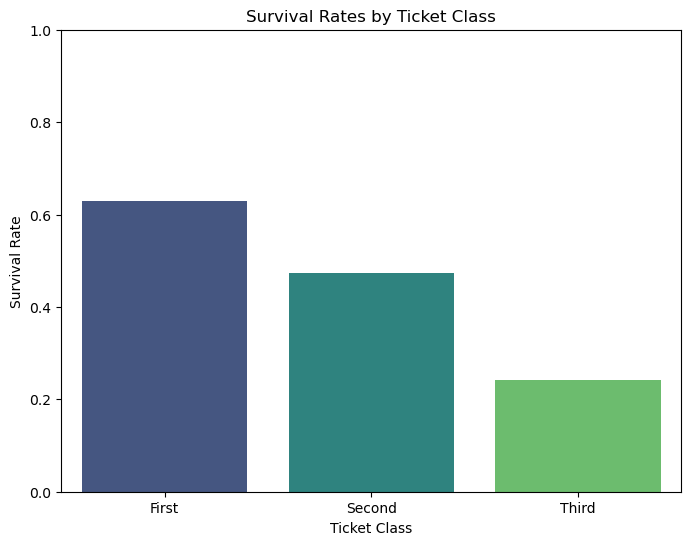

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rates for each ticket class
survival_rates = titanic_data.groupby('class')['survived'].mean()

# Plot the survival rates
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='viridis')
plt.title('Survival Rates by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

plt.show()

10. Did gender play a significant role in survival outcomes?

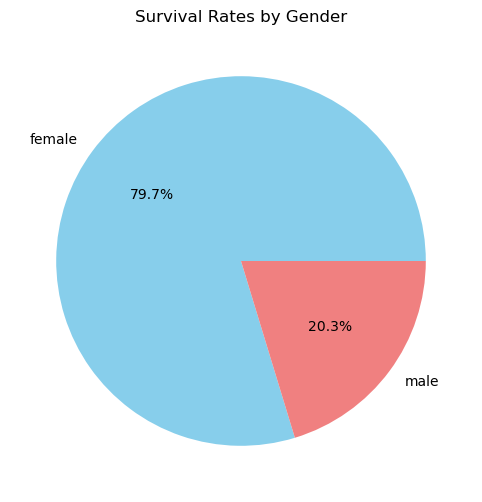

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate survival rates for males and females
survival_rates_gender = titanic_data.groupby('sex')['survived'].mean()

# Plot the survival rates by gender using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(survival_rates_gender, labels=survival_rates_gender.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Survival Rates by Gender')
plt.show()


11. What was the age distribution of passengers, and how did age impact survival?

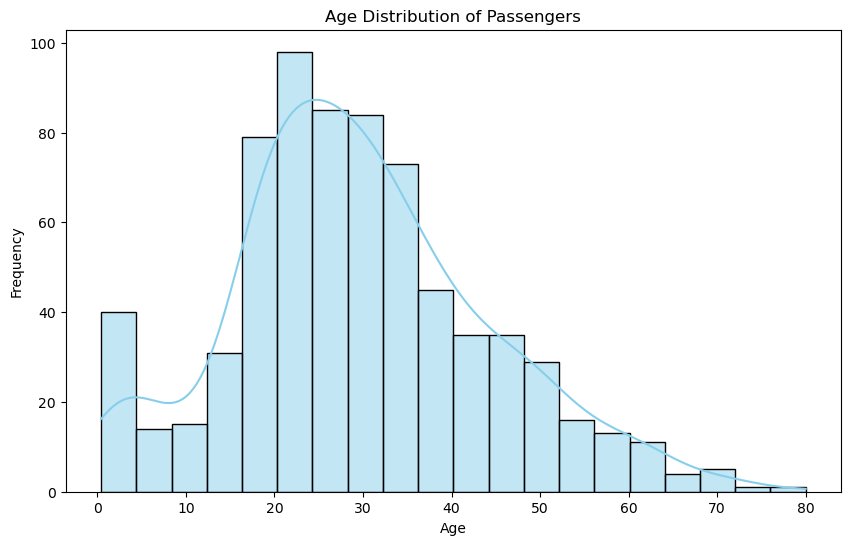

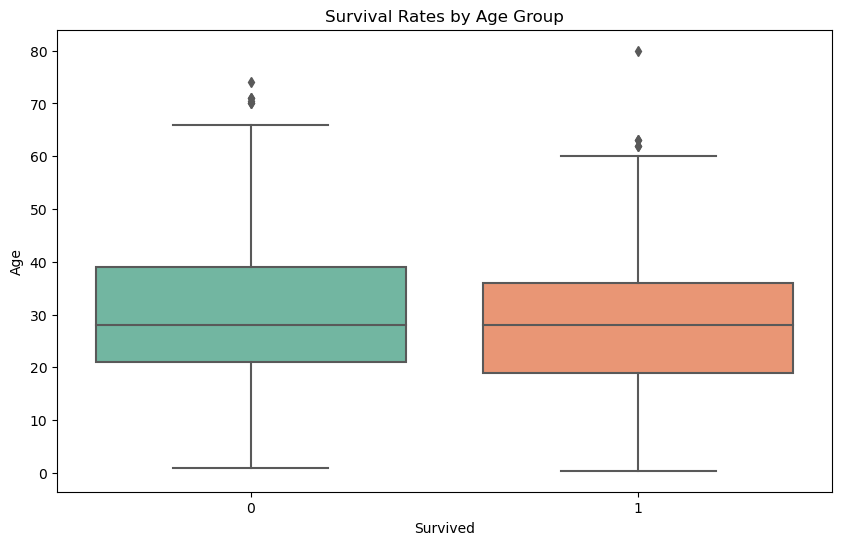

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot survival rates by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=titanic_data, palette='Set2')
plt.title('Survival Rates by Age Group')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

These visualizations suggest that age indeed had an impact on survival during the Titanic disaster. Younger passengers, on average, were more likely to survive compared to older passengers. However, it's important to note that correlation does not imply causation, and other factors such as gender, class, and proximity to lifeboats may have also influenced survival rates.

12. Were passengers traveling with family more likely to survive?

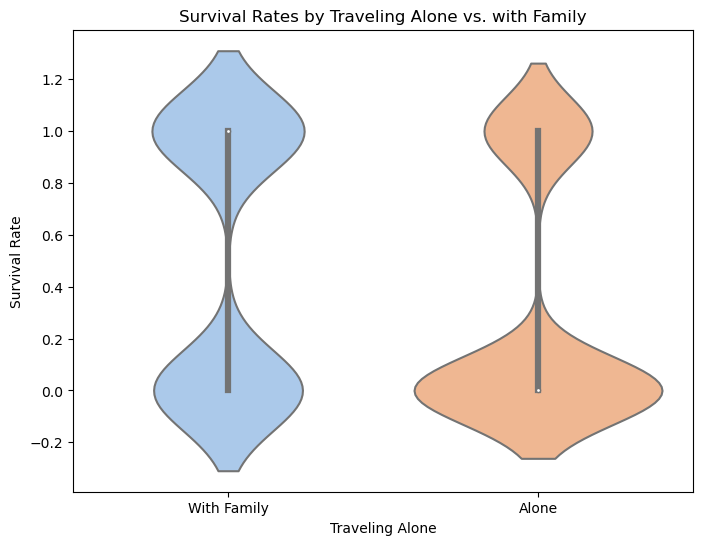

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new feature indicating whether a passenger is traveling alone or with family
titanic_data['traveling_alone'] = (titanic_data['sibsp'] + titanic_data['parch'] == 0)

# Calculate survival rates for passengers traveling alone and those traveling with family
survival_rates_family = titanic_data.groupby('traveling_alone')['survived'].mean().reset_index()

# Plot the survival rates using a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='traveling_alone', y='survived', data=titanic_data, palette='pastel')
plt.title('Survival Rates by Traveling Alone vs. with Family')
plt.xlabel('Traveling Alone')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.show()


13. How did fare prices correlate with survival outcomes?

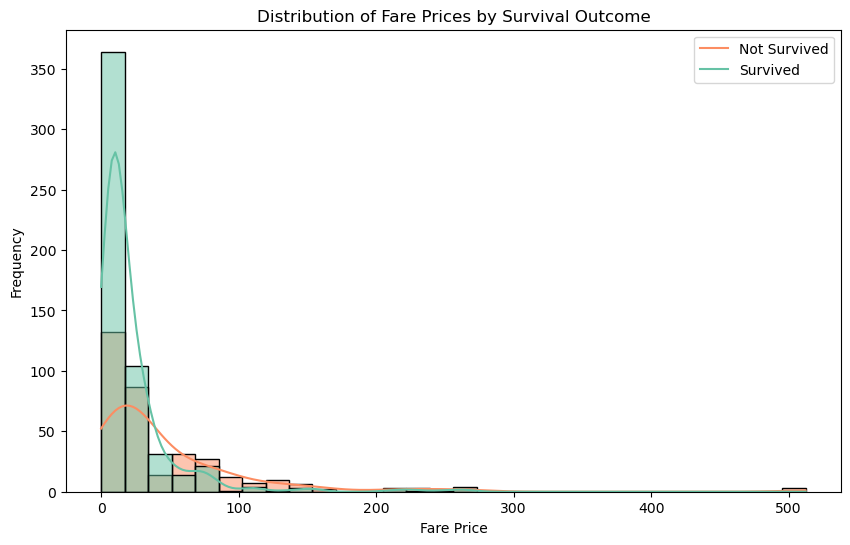

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot fare distribution for survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='fare', hue='survived', bins=30, kde=True, palette='Set2')
plt.title('Distribution of Fare Prices by Survival Outcome')
plt.xlabel('Fare Price')
plt.ylabel('Frequency')
plt.legend(['Not Survived', 'Survived'])
plt.show()


From the graph "Distribution of Ticket Prices by Survival Outcome," it can be observed that passengers who paid higher fares tend to have a greater chance of survival. This suggests a correlation between ticket fare and survival chances. However, it should be noted that other factors such as passenger class and access to lifeboats may have also influenced survival outcomes. Thus, while ticket price appears to play a role in survival, it is not the sole factor that affected survival outcomes.

14. Are there any notable patterns or anomalies in the data that require further investigation?

Missing Values:
 survived             0
pclass               0
sex                  0
age                177
sibsp                0
parch                0
fare                 0
embarked             2
class                0
who                  0
adult_male           0
deck               688
embark_town          2
alive                0
alone                0
traveling_alone      0
dtype: int64


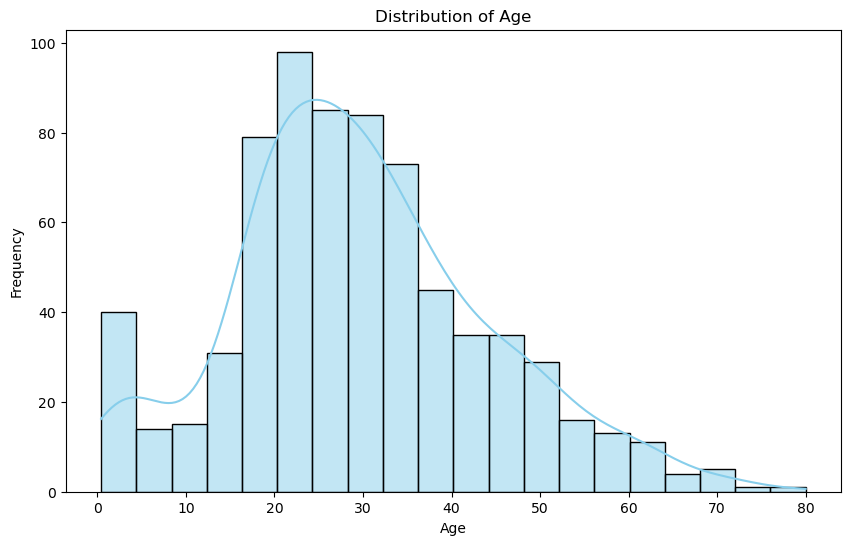

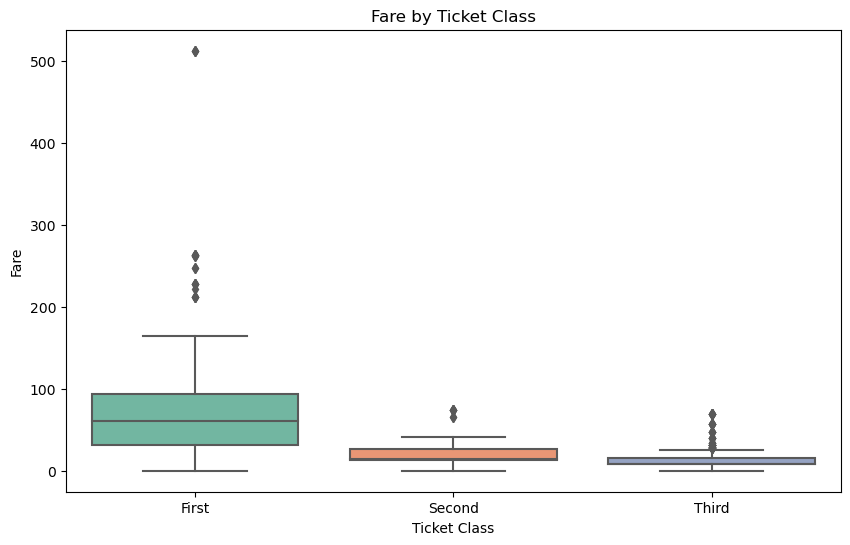

Inconsistent Data (Male Survivors):
     survived  pclass   sex   age  sibsp  parch     fare embarked   class  who  \
17         1       2  male   NaN      0      0  13.0000        S  Second  man   
21         1       2  male  34.0      0      0  13.0000        S  Second  man   
23         1       1  male  28.0      0      0  35.5000        S   First  man   
36         1       3  male   NaN      0      0   7.2292        C   Third  man   
55         1       1  male   NaN      0      0  35.5000        S   First  man   

    adult_male deck  embark_town alive  alone  traveling_alone  
17        True  NaN  Southampton   yes   True             True  
21        True    D  Southampton   yes   True             True  
23        True    A  Southampton   yes   True             True  
36        True  NaN    Cherbourg   yes   True             True  
55        True    C  Southampton   yes   True             True  


In [27]:
# Check for missing values
missing_values = titanic_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Explore univariate distributions
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyze bivariate relationships
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='fare', data=titanic_data, palette='Set2')
plt.title('Fare by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.show()

# Detect inconsistencies
inconsistent_data = titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['survived'] == 1)]
print("Inconsistent Data (Male Survivors):\n", inconsistent_data.head())

15. Once we understand these patterns, what can we learn from them?

Once we understand the patterns observed in the Titanic dataset, we can glean several insights that have broader implications for understanding historical events and informing future safety measures:

1-Socioeconomic Disparities:The correlation between ticket class and survival rates highlights the socioeconomic disparities present among passengers. This reflects the social stratification of the time, where individuals with higher socioeconomic status were more likely to have better survival chances. This underscores the importance of equitable access to resources and opportunities, even in times of crisis.

2-Gender and "Women and Children First" Protocol:The higher survival rates among females compared to males align with the historical account of the "women and children first" protocol during the Titanic evacuation. This protocol prioritized the evacuation of women and children, which likely contributed to the gender disparity in survival rates. Understanding historical gender norms and their impact on survival outcomes can inform discussions on gender equity and disaster preparedness strategies.

3-Family Ties and Social Support:Passengers traveling with family members had varying survival rates compared to those traveling alone. This suggests the importance of social support networks during emergencies. Future safety measures could emphasize the importance of family reunification and support systems in disaster response plans.

Overall, reflecting on the insights gained from our analysis of the Titanic dataset allows us to draw connections between historical events and contemporary issues related to social equity, disaster preparedness, and safety measures. By learning from past tragedies, we can work towards building more resilient and inclusive communities and improving responses to future emergencies.    